# Ridge and Lasso Regression

 Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.




In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
#from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## load DataSet

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
data.shape

(506, 13)

In [4]:
target.shape

(506,)

In [5]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston_df=pd.DataFrame(data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
import pandas as pd
#x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
#y = pd.DataFrame(boston['target'],columns=['target'])

x=data
y=target

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

print(len(X_train), len(y_train))

152 152
354 354


In [8]:
x.shape

(506, 13)

## Create a Ridge Regression
       shrinking coefficient magnitude using Ridge regression
       
###   Ridge (L2 norm)
![image.png](https://miro.medium.com/max/1374/1*hAGhQehrqAmT1pvz3q4t8Q.png)

 ![image.png](https://miro.medium.com/max/670/1*sC4KLMHU0j_1gR3VmlgGtg.png)


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576869
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123906
ridge regression train score high alpha: 0.7172809669938279
ridge regression test score high alpha: 0.6805765856921941


## R2 Score

In [10]:
from sklearn.metrics import r2_score
#R2 square
r2_score(y_test,rr100.predict(X_test))

0.6805765856921941

In [11]:
rr.coef_

array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])

In [12]:
type(rr.coef_)
np.ravel(rr.coef_)

array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])


### $\alpha$ 愈小則等同於Linear Regression; $\alpha$ 愈大則會限制$\omega$ 的值。<br>這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

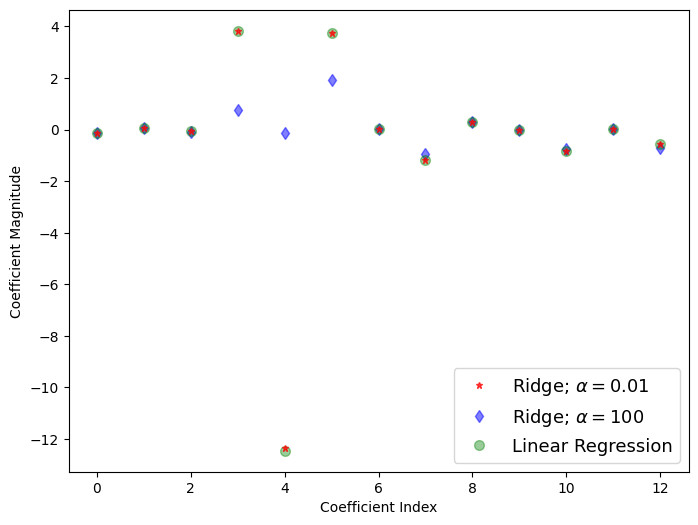

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(np.ravel(rr.coef_),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers # zorder for ordering the markers
plt.plot(np.ravel(rr100.coef_),alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=13,loc=4)
plt.show()

## Create a Lasso Regression


### Lasso (L1 norm)
 ![image.png](https://miro.medium.com/max/1402/1*P5Lq5mAi4WAch7oIeiS3WA.png)

 ![image.png](https://miro.medium.com/max/949/1*JH9eAS2I9mwOpuFLg-gD6g.png)


In [14]:
lasso = Lasso(alpha=100) #default alpha=1
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
#Lasso(alpha=0.01)
print("number of features used: ", coeff_used)
print(lasso)

training score: 0.22175771924133436
test score:  0.2478170670970702
number of features used:  2
Lasso(alpha=100)


In [15]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01957383,
       -0.        ,  0.00821984, -0.        ])

In [16]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01957383,
       -0.        ,  0.00821984, -0.        ])

In [17]:
rr = Ridge(alpha=100) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
train_score=rr.score(X_train,y_train)
test_score=rr.score(X_test,y_test)

print("training score:", train_score )
print("test score: ", test_score)


training score: 0.7172809669938279
test score:  0.6805765856921941


In [18]:
#Lasso(alpha=0.01)
lasso001 = Lasso(alpha=0.01, max_iter=10000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
print('-'*20)
#Lasso(alpha=0.0001)
lasso00001 = Lasso(alpha=100, max_iter=10000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

#LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print('-'*20)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

training score for alpha=0.01: 0.7414845253242521
test score for alpha =0.01:  0.7096270988778385
number of features used: for alpha =0.01: 13
--------------------
training score for alpha=0.0001: 0.22175771924133436
test score for alpha =0.0001:  0.2478170670970702
number of features used: for alpha =0.0001: 2
--------------------
LR training score: 0.7419034960343789
LR test score:  0.7147895265576869


In [19]:
lasso00001.coef_!=0

array([False, False, False, False, False, False, False, False, False,
        True, False,  True, False])

In [20]:
lasso001.coef_

array([-1.27713405e-01,  4.65577935e-02, -6.65090404e-02,  3.66586424e+00,
       -9.04345544e+00,  3.75356885e+00,  4.57660605e-03, -1.13835120e+00,
        2.70602690e-01, -7.88767607e-03, -7.86868445e-01,  1.27444143e-02,
       -5.63772374e-01])


### $\alpha$=0.01 會比$\alpha$=0.1 使$\omega$ 更小<br> 若$\omega$ 很小等於Linear regression 這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

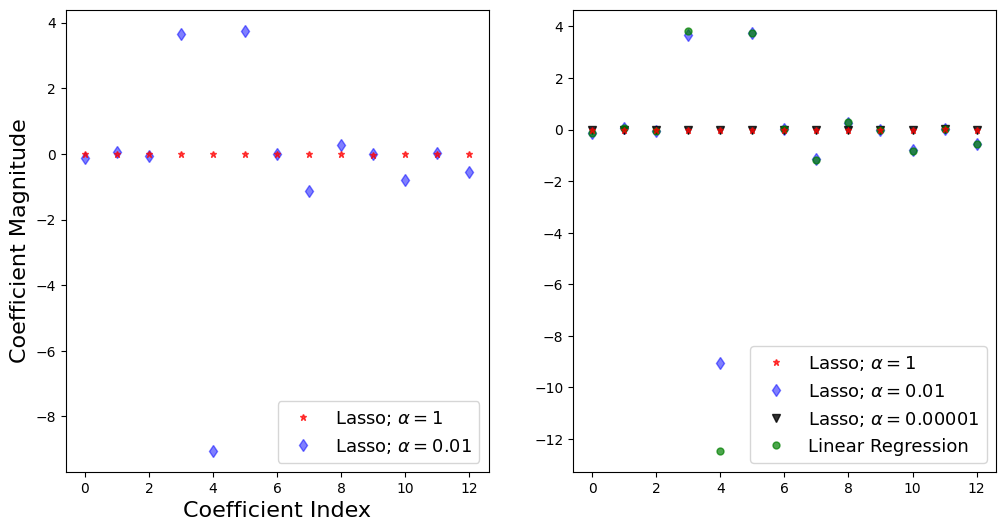

In [21]:
plt.figure(figsize=(12, 6),)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.legend(fontsize=13,loc=4)

plt.show()

愈高維度時, Lassso 愈有機會只使用部份特徵(部份切面)來找到低點, 而Ridge像球體一樣無法只用部份特徵才找到最低點

![image.png](attachment:image.png)